In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Scale inputs

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
X_standardized = scaler.fit_transform(df)

In [13]:
df_standardized = pd.DataFrame(X_standardized, columns=df.columns)

In [14]:
df_standardized

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


### K-Means

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X_standardized)
silhouette_avg = silhouette_score(X_standardized, y_pred)
silhouette_avg

0.6593155081294824

In [21]:
df_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,2
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0


### Try elbow method

In [38]:
silhouettes = {}
for i in range(2, 50, 2):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X_standardized)
    silhouette_avg = silhouette_score(X_standardized, y_pred)
    silhouettes[i] = silhouette_avg

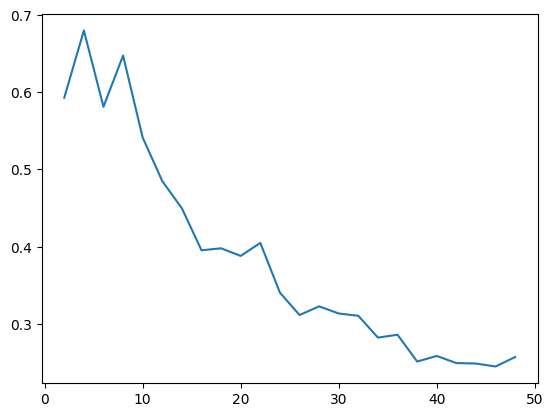

In [44]:
plt.plot(list(silhouettes.keys()), silhouettes.values())

### Summary

although there is not much visible elbow, i would consider taking k-means with value around 15.

if the lower value is needed i would take something around 5